## Assignment No. 2

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

0.0.1 MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data() # Data loading
x_train, x_test = x_train/255.0 , x_test/255.0 #Normalizing the data

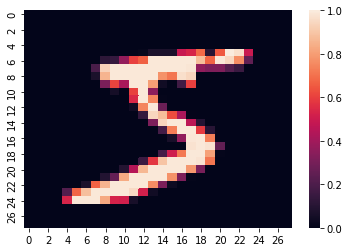

In [3]:
sns.heatmap(x_train[0])
plt.show()

Prepearing the model

In [4]:
model = Sequential([
Flatten(input_shape=(28,28)),
Dense(128, activation="relu"),
Dropout(0.2),
Dense(10)
])

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.19316395,  0.05687325,  1.0475322 , -0.34722733, -0.1688012 ,
         0.53888667, -0.15296635, -0.09366216, -0.6049562 , -0.7471332 ]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.10854152, 0.09471213, 0.25506055, 0.06322763, 0.07557818,
        0.15337034, 0.07678447, 0.08147585, 0.04886261, 0.04238674]],
      dtype=float32)

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
model.compile(optimizer="adam", loss = loss_fn, metrics=["accuracy"])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2926 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1074 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9765


In [10]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0791 - accuracy: 0.9743 - 631ms/epoch - 2ms/step


[0.07910005003213882, 0.9743000268936157]

Validation of Model

In [11]:
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test),batch_size=200)

Epoch 1/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0673 - val_accuracy: 0.9802
Epoch 2/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0672 - val_accuracy: 0.9795
Epoch 3/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0652 - val_accuracy: 0.9811
Epoch 4/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 5/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0662 - val_accuracy: 0.9808


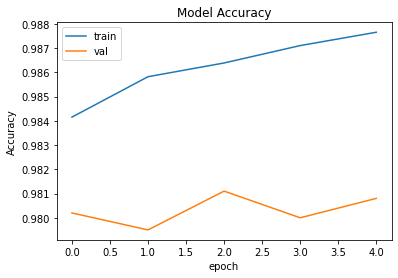

In [12]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()